<h1>Hotel Bookings Data<h1>

# Pendahuluan

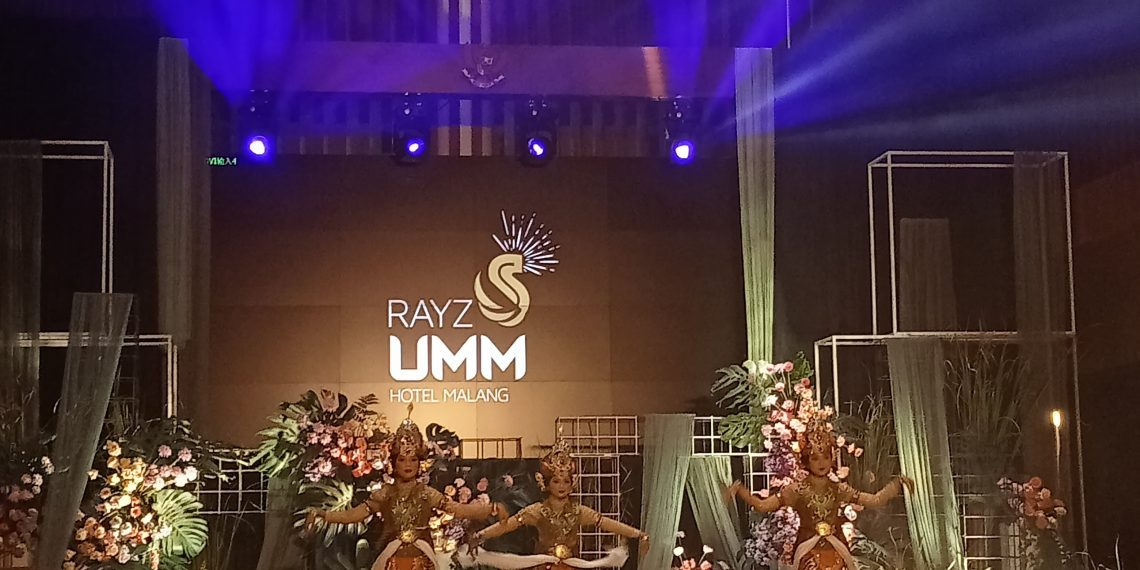

## Pernyataan Masalah

Dataset *Hotel Bookings Data* adalah kumpulan data terbuka yang memuat informasi tentang permintaan pemesanan hotel.

Alasan memilih dataset ini untuk pengembangan analisis *Big Data* adalah sebagai berikut:

1. Membuka peluang lebih luas untuk eksplorasi analisis data.  
2. Memberikan wawasan mengenai tingkat pemesanan serta mendeteksi pembatalan hotel.  
3. Meningkatkan jumlah pengunjung yang datang sekaligus meminimalkan potensi kerugian.  
4. Mengoptimalkan rekomendasi pilihan hotel selama musim liburan.  

Industri perhotelan menghadapi tantangan besar berupa tingginya tingkat pembatalan pemesanan dan perlunya perencanaan pemesanan yang tepat. Untuk hotel dengan kapasitas terbatas, sangat penting memahami kemungkinan pembatalan agar dapat mengelola sumber daya secara optimal serta meningkatkan kepuasan pelanggan.

Melalui *Hotel Bookings Data*, analisis pola pemesanan dan pembatalan dapat dilakukan untuk mengidentifikasi faktor-faktor yang memengaruhi keputusan pelanggan dalam membatalkan reservasi. Wawasan ini membantu pengelola hotel memahami penyebab pembatalan, sehingga mereka dapat menyusun strategi pemesanan yang lebih baik, mengurangi tingkat pembatalan, dan mengelola kapasitas kamar dengan lebih efisien.

## Rencana Mengatasi Pernyataan Masalah

Untuk menangani masalah ini, *Hotel Bookings Data* menyediakan berbagai variabel penting, seperti tipe hotel, status pembatalan, waktu antara pemesanan dan kedatangan (*lead time*), jenis layanan makanan, dan variabel lainnya.

Metodologi yang diterapkan mencakup beberapa tahapan berikut:

1. **Pra-pemrosesan Data**: Menangani data yang tidak lengkap, mengubah variabel kategorikal menjadi format numerik, serta melakukan normalisasi data.  
2. **Eksplorasi Data**: Mempelajari hubungan antara variabel melalui analisis statistik deskriptif dan visualisasi untuk mengidentifikasi faktor-faktor yang memengaruhi pembatalan pemesanan.  
3. **Pemodelan**: Menerapkan algoritma pembelajaran mesin seperti *Decision Tree*, *Random Forest*, atau *Logistic Regression* untuk memprediksi kemungkinan pembatalan berdasarkan variabel yang tersedia.  
4. **Evaluasi Model**: Menilai kinerja model prediksi menggunakan metrik seperti akurasi, presisi, *recall*, dan F1-score.  

Langkah-langkah ini dirancang untuk memahami pola pembatalan dan menghasilkan prediksi yang akurat.

## Teknik Analisis yang Digunakan

Pada tahap awal, dilakukan eksplorasi data (EDA) untuk memahami pola dan distribusi dalam dataset. Proses ini melibatkan penggunaan visualisasi seperti grafik distribusi, histogram, dan *heatmap* untuk mengidentifikasi variabel yang memiliki pengaruh signifikan terhadap pembatalan pemesanan serta preferensi pelanggan. EDA juga berfungsi mendeteksi nilai-nilai yang hilang atau *outlier* dalam dataset, yang harus ditangani agar model yang dibangun lebih andal.

Pendekatan analisis yang digunakan berfokus pada pemodelan klasifikasi untuk memprediksi pembatalan pemesanan. Algoritma *Random Forest* dimanfaatkan untuk mengidentifikasi variabel-variabel yang paling memengaruhi pembatalan dan memprediksi kemungkinan terjadinya pembatalan di masa mendatang. *Random Forest* memiliki keunggulan dalam menangani masalah *overfitting* pada dataset dengan banyak fitur, serta mampu memberikan wawasan lebih mendalam melalui analisis *feature importance* yang disediakan oleh model.

## Manfaat Analisis untuk Konsumen

Analisis ini akan memberikan manfaat langsung bagi konsumen, khususnya pihak hotel atau manajer hotel, melalui beberapa cara berikut:

- **Mengurangi Tingkat Pembatalan**  
- **Mengoptimalkan Pemanfaatan Kapasitas**  
- **Meningkatkan Kepuasan Pelanggan**  
- **Menyusun Strategi Pemasaran yang Lebih Efektif**  

# Package yang Diperlukan

Daftar package ini membantu mengidentifikasi pustaka yang dibutuhkan untuk melakukan analisis data.

In [ ]:
# Import package yang diperlukan
import pandas as pd             # Untuk manipulasi dan analisis data
import numpy as np              # Untuk operasi numerik
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns           # Visualisasi data yang lebih menarik
import warnings                  # Mengatasi peringatan
from sklearn.model_selection import train_test_split  # Membagi data menjadi training dan testing
from sklearn.preprocessing import StandardScaler, LabelEncoder      # Standarisasi dan Konversi data
from sklearn.ensemble import RandomForestClassifier   # Model Random Forest untuk klasifikasi
from sklearn.linear_model import LogisticRegression   # Model Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

Pesan peringatan yang muncul saat memuat pustaka dapat membuat bingung. Karena itu, menghapus pesan-pesan tersebut akan menjadikan tampilan kode lebih bersih, profesional, dan mudah dimengerti.

In [ ]:
# Menghilangkan peringatan
warnings.filterwarnings("ignore")

# Sumber Data

Dataset ini berasal dari *Hotel Bookings Dataset* yang berisi informasi terkait pemesanan hotel, seperti jenis hotel, status pembatalan, tanggal kedatangan, preferensi pelanggan, dan pilihan makanan. Tujuan utama dari penyusunan dataset ini adalah untuk membangun model prediksi yang dapat mengklasifikasikan kemungkinan pembatalan pemesanan, melakukan segmentasi pelanggan, serta meningkatkan kepuasan pelanggan untuk mendukung perkembangan industri pariwisata dan perhotelan. Dataset ini mencakup:

- **Periode Pengumpulan Data**: 1 Juli 2015 hingga 31 Agustus 2017  
- **Jumlah Variabel**: 32 kolom  
- **Jumlah Observasi**: 119.390 baris data, terdiri dari 40.060 observasi untuk Hotel Resort (H1) dan 79.330 observasi untuk Hotel Kota (H2)  

Salah satu ciri khas dari dataset ini adalah metode pengumpulannya yang melibatkan dua tipe hotel berbeda, yakni Hotel Resort (H1) dan Hotel Kota (H2), baik untuk pemesanan yang terealisasi maupun yang dibatalkan. Data ini dikumpulkan secara nyata (real), tanpa menyertakan elemen yang dapat mengidentifikasi hotel atau pelanggan secara spesifik.

Kedua hotel ini berlokasi di Portugal, dengan Hotel Resort (H1) terletak di wilayah Algarve dan Hotel Kota (H2) berlokasi di Lisbon.

In [ ]:
# Mengunduh file CSV dari URL GitHub
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv -O hotels.csv

--2024-12-24 06:20:47--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotels.csv’

hotels.csv          100%[===================>]  16.07M  --.-KB/s    in 0.1s    

2024-12-24 06:20:48 (122 MB/s) - ‘hotels.csv’ saved [16855599/16855599]



# Informasi Dataset

Setelah data berhasil diimpor, langkah berikutnya adalah memahami struktur dan kontennya, termasuk jumlah baris, kolom, serta jenis data di setiap kolom. Hal ini bertujuan untuk memastikan semua kolom telah terimpor dengan benar sekaligus mendeteksi potensi masalah, seperti tipe data yang tidak sesuai (contohnya, angka yang terbaca sebagai teks).

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('hotels.csv')

# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Nilai yang hilang atau *missing values* adalah masalah umum yang sering ditemukan dalam dataset. Memeriksa jumlah data yang hilang di setiap kolom sangat penting untuk menentukan apakah perlu dilakukan imputasi atau menghapus baris/kolom yang bermasalah. Kehilangan data ini dapat terjadi karena berbagai faktor, seperti informasi yang tidak tersedia saat proses pemesanan.

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Eksplorasi dan Analisis Data

## Eksplorasi Data

Eksplorasi data merupakan langkah awal dalam analisis yang bertujuan untuk memahami dan memperoleh wawasan tentang dataset sebelum melanjutkan ke tahap pemrosesan lebih lanjut. Proses ini melibatkan pengenalan dataset, identifikasi potensi masalah, serta penggunaan visualisasi data untuk meminimalkan kesalahan selama analisis dan pemodelan.

#### 1.Perbandingan Pembatalan pemesanan Berdasarkan Bulan Kedatangan

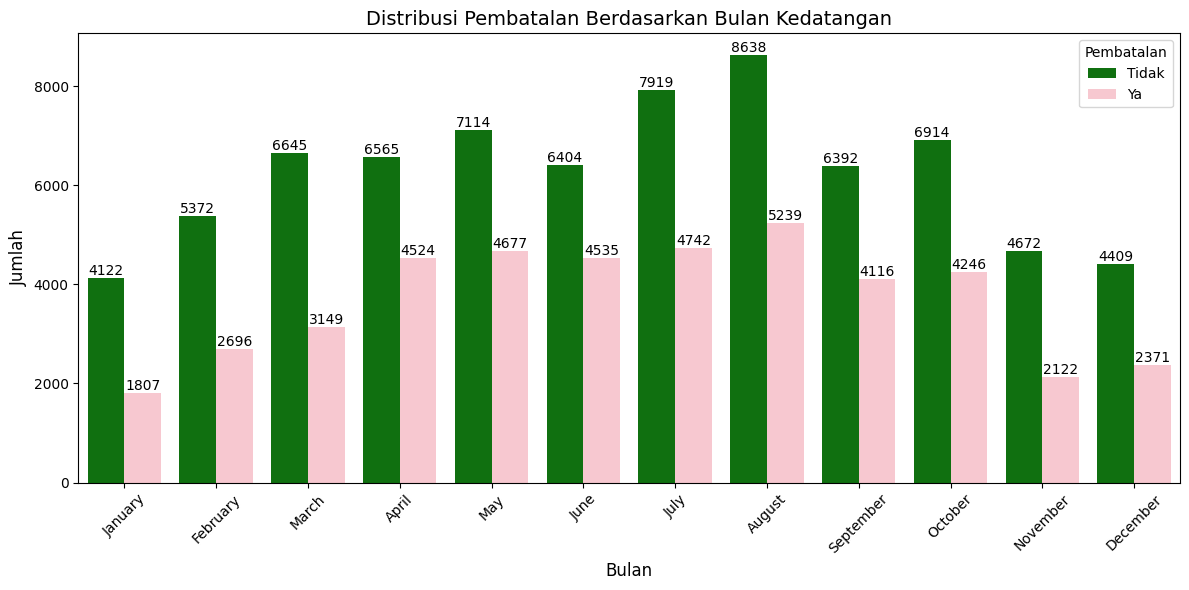

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Urutkan bulan secara kronologis
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

# Plot distribusi pembatalan
plt.figure(figsize=(12, 6))

# Ganti palet warna secara manual
# Hijau untuk tidak dibatalkan (0) dan merah muda untuk dibatalkan (1)
color_map = {0: 'green', 1: 'pink'}
g = sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette=color_map)

# Tambahkan data label di atas batang
for container in g.containers:
    g.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribusi Pembatalan Berdasarkan Bulan Kedatangan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Pembatalan', loc='upper right', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi pembatalan, dapat disimpulkan bahwa jumlah pembatalan paling banyak terjadi pada bulan-bulan sibuk seperti Juli dan Agustus, yang bertepatan dengan musim liburan atau peak season. Sebaliknya, bulan-bulan seperti November dan Desember menunjukkan tingkat pembatalan yang lebih rendah, karena merupakan periode off-season dengan aktivitas perjalanan yang lebih sedikit. Selain itu, terlihat bahwa jumlah pembatalan cenderung meningkat seiring dengan jumlah reservasi yang tinggi, menunjukkan adanya hubungan antara reservasi dan pembatalan.

#### 2.Informasi Tahun Kedatangan

Visualisasi informasi tahun kedatangan di bagi dalam 2 grafik histogram. Bertujuan untuk mendapat informasi jumlah pemesanan hotel berdasarkan tahun dan bulan kedatangan.

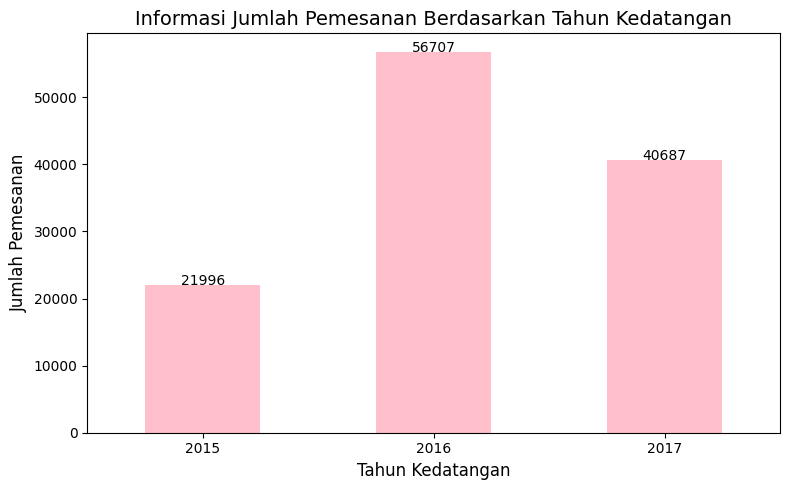

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Informasi jumlah pemesanan berdasarkan tahun kedatangan
arrival_year_info = df['arrival_date_year'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(8, 5))
bars = arrival_year_info.plot(kind='bar', color='pink')  # Mengubah warna batang menjadi pink

# Menambahkan total nilai di atas batang
for i, value in enumerate(arrival_year_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Jumlah Pemesanan Berdasarkan Tahun Kedatangan', fontsize=14)
plt.xlabel('Tahun Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()


**Kesimpulan**:  
Berdasarkan visualisasi jumlah pemesanan berdasarkan tahun kedatangan, tahun 2016 tercatat sebagai tahun dengan jumlah pemesanan tertinggi. Pada tahun tersebut, terdapat peningkatan yang signifikan dalam jumlah pemesanan dibandingkan dengan tahun 2015. Namun, pada tahun 2017, terjadi penurunan dalam jumlah pemesanan jika dibandingkan dengan tahun 2016, meskipun angka tersebut masih lebih tinggi daripada tahun 2015. Hal ini menunjukkan bahwa terdapat fluktuasi dalam jumlah pemesanan dari tahun ke tahun, dengan puncaknya terjadi pada tahun 2016.

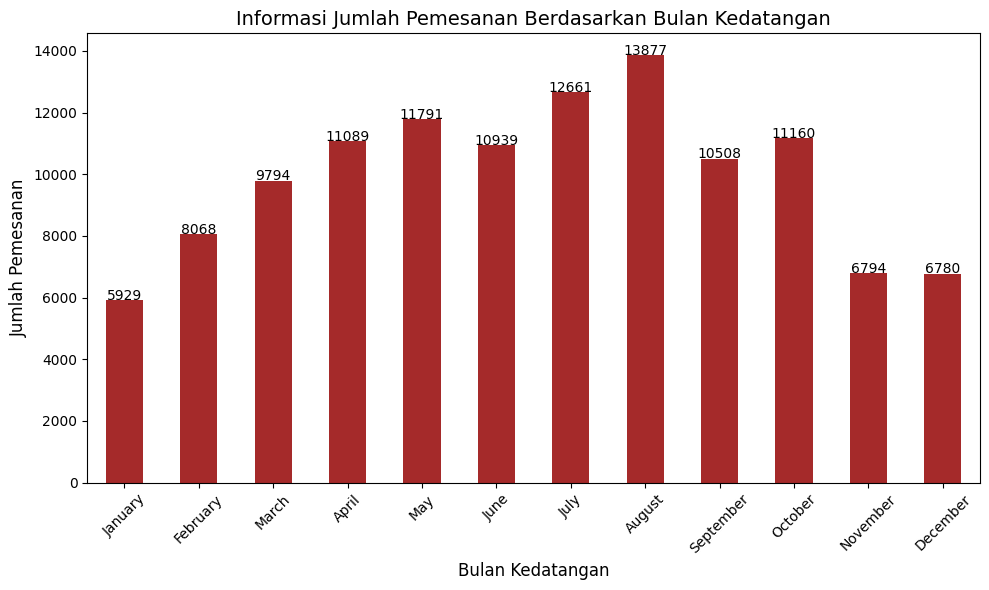

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Informasi jumlah pemesanan berdasarkan bulan kedatangan
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

arrival_month_info = df['arrival_date_month'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(10, 6))
bars = arrival_month_info.plot(kind='bar', color='brown')  # Mengubah warna batang menjadi coklat

# Menambahkan total nilai di atas batang
for i, value in enumerate(arrival_month_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Jumlah Pemesanan Berdasarkan Bulan Kedatangan', fontsize=14)
plt.xlabel('Bulan Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()


Berdasarkan visualisasi jumlah pemesanan berdasarkan bulan kedatangan, dapat disimpulkan bahwa bulan Agustus merupakan bulan dengan jumlah pemesanan tertinggi, mencapai 13.877 pemesan. Sepanjang tahun, terdapat fluktuasi, di mana beberapa bulan seperti November, Desember, dan Januari menunjukkan angka pemesanan yang lebih rendah. Sementara itu, bulan Juni dan Juli mengalami peningkatan pemesanan yang mungkin dipengaruhi oleh musim liburan. Secara keseluruhan, pola pemesanan menunjukkan variasi yang signifikan sepanjang tahun 2015-2017.

#### 3.Jumlah Pembatalan Pemesanan

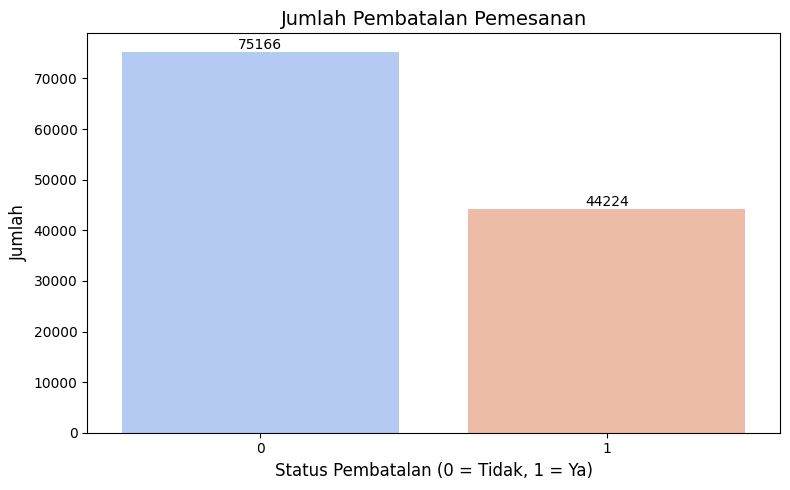

In [ ]:
# Plot jumlah pembatalan pemesanan
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_canceled', data=df, palette='coolwarm')

# Menambahkan total nilai di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Jumlah Pembatalan Pemesanan', fontsize=14)
plt.xlabel('Status Pembatalan (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi jumlah pembatalan pemesanan, dapat disimpulkan bahwa jumlah pemesanan yang berhasil (status 0) jauh lebih tinggi dibandingkan dengan yang dibatalkan (status 1). Dengan lebih dari 70.000 pemesanan yang tidak dibatalkan, jelas terlihat bahwa sebagian besar transaksi berhasil diselesaikan. Di sisi lain, jumlah pemesanan yang dibatalkan hanya sekitar 40.000, yang menunjukkan bahwa meskipun terdapat beberapa pembatalan, proporsi pemesanan yang berhasil tetap lebih dominan. Hal ini menunjukkan bahwa tingkat pemesanan secara keseluruhan cukup baik, dengan tingkat pembatalan yang relatif rendah.

#### 4.Perbandingan Pembatalan Terhadap Pemesanan Hotel

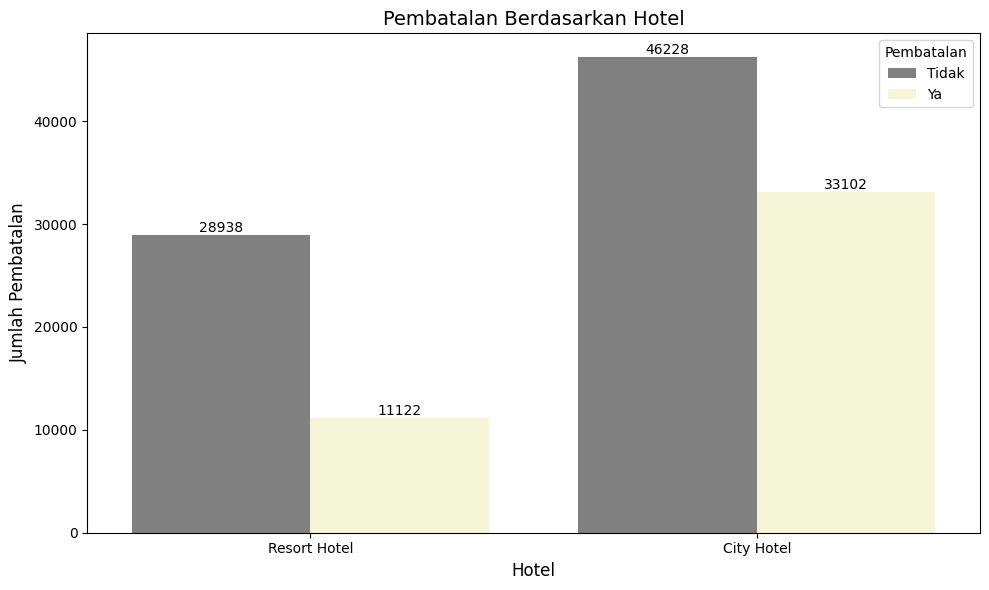

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pembatalan berdasarkan hotel
plt.figure(figsize=(10, 6))

# Mengatur palet warna secara manual
color_map = {0: 'gray', 1: 'lightgoldenrodyellow'}  # 0 untuk tidak dibatalkan (abu-abu), 1 untuk dibatalkan (krim)
ax = sns.countplot(data=df, x='hotel', hue='is_canceled', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=10)

# Menambahkan judul, label, dan legenda
plt.title('Pembatalan Berdasarkan Hotel', fontsize=14)
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Jumlah Pembatalan', fontsize=12)
plt.legend(title='Pembatalan', loc='upper right', labels=['Tidak', 'Ya'])

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi pembatalan pemesanan menurut jenis hotel, dapat disimpulkan bahwa Hotel Kota (City Hotel) mengalami jumlah pembatalan yang lebih tinggi dibandingkan dengan Hotel Resort (Resort Hotel). Di Hotel Kota, pembatalan mencapai lebih dari 30.000, sementara Hotel Resort mencatat sekitar 20.000 pembatalan. Meskipun kedua jenis hotel mengalami pembatalan, proporsi yang lebih tinggi di Hotel Kota menunjukkan bahwa faktor lokasi mungkin memengaruhi keputusan pelanggan untuk membatalkan pemesanan. Secara keseluruhan, visualisasi ini menunjukkan bahwa Hotel Resort lebih sukses dalam mempertahankan pemesanan, sedangkan Hotel Kota menghadapi tantangan yang lebih besar terkait dengan pembatalan.

#### 5.Ditribusi Pemesanan Makanan

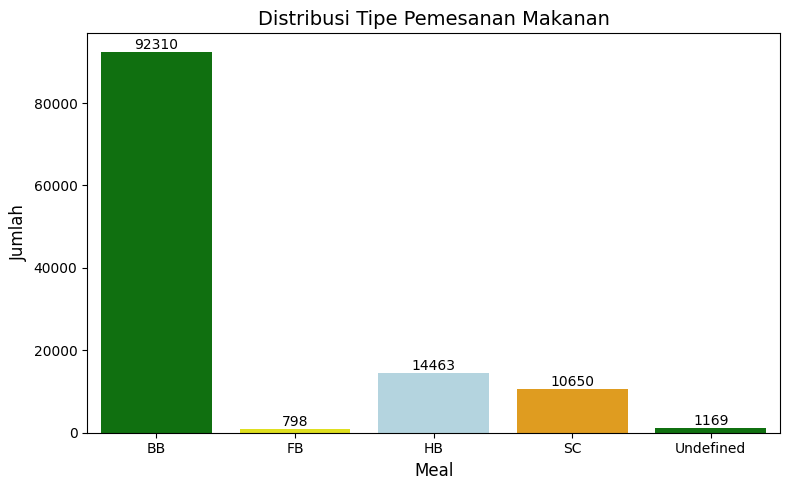

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi tipe pemesanan makanan
plt.figure(figsize=(8, 5))

# Mengatur palet warna secara manual
color_map = ['green', 'yellow', 'lightblue', 'orange']  # Ubah sesuai kebutuhan
ax = sns.countplot(x='meal', data=df, palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Tipe Pemesanan Makanan', fontsize=14)
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi tipe pemesanan makanan, terlihat bahwa tipe pemesanan "BB" (Bed and Breakfast) mendominasi dengan lebih dari 80.000 transaksi. Di sisi lain, tipe pemesanan lainnya seperti "FB" (Full Board), "HB" (Half Board), dan "SC" (Self Catering) menunjukkan angka yang jauh lebih rendah, masing-masing di bawah 30.000. Tipe pemesanan yang belum terdefinisi ("Undefined") juga menunjukkan angka yang rendah. Hal ini menunjukkan bahwa pilihan Bed and Breakfast sangat diminati oleh pelanggan, sedangkan tipe pemesanan lainnya kurang menarik perhatian, yang mengindikasikan preferensi yang jelas untuk layanan yang lebih sederhana dan praktis.

#### 6.10 Negara Pengunjung Terbanyak

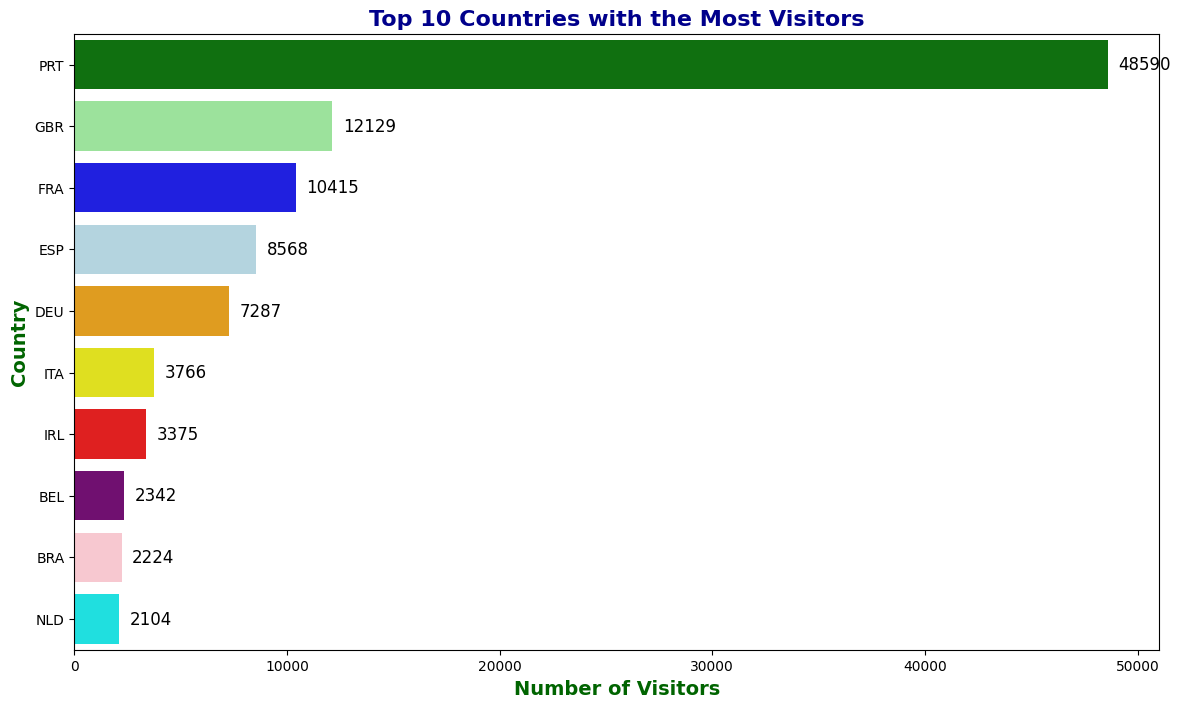

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah pengunjung untuk setiap negara
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Pilih 10 negara teratas
top_10_countries = country_counts.head(10)

# Membuat barplot
plt.figure(figsize=(14, 8))
# Mengganti palet warna menjadi hijau dan biru
sns.barplot(x='counts', y='country', data=top_10_countries, palette=['green', 'lightgreen', 'blue', 'lightblue', 'orange', 'yellow', 'red', 'purple', 'pink', 'cyan'])

# Menambahkan angka pada setiap batang untuk menunjukkan jumlah pengunjung
for index, value in enumerate(top_10_countries['counts']):
    plt.text(value + 500, index, f'{value}', ha='left', va='center', fontsize=12, color='black')  # Mengubah warna teks menjadi hitam agar kontras

# Menambahkan judul dan label sumbu
plt.title('Top 10 Countries with the Most Visitors', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Visitors', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Country', fontsize=14, weight='bold', color='darkgreen')

# Menampilkan grafik
plt.show()


Berdasarkan visualisasi yang menampilkan 10 negara dengan jumlah pengunjung terbanyak, Portugal (PRT), termasuk pengunjung domestik, muncul sebagai negara dengan jumlah pengunjung tertinggi, hampir mencapai 50.000. Di belakangnya terdapat Inggris (GBR), Prancis (FRA), dan Spanyol (ESP), yang masing-masing mencatat jumlah pengunjung yang signifikan, meskipun masih jauh di bawah angka Portugal. Jerman (DEU), Italia (ITA), Belgia (BEL), Brasil (BRA), dan Belanda (NLD) juga terdaftar sebagai negara dengan jumlah pengunjung yang lebih rendah, namun tetap menunjukkan minat kedatangan yang tinggi terhadap Portugal.

#### 7.Informasi Saluran Ditribusi Pemesanan

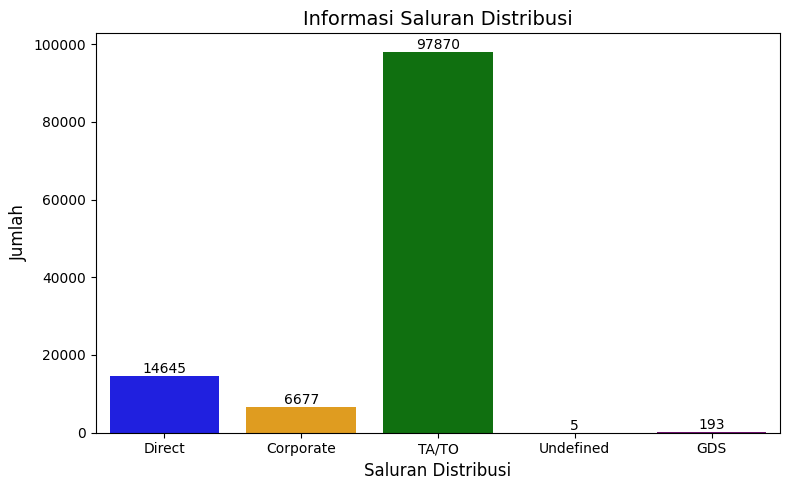

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi saluran distribusi
plt.figure(figsize=(8, 5))

# Mengatur palet warna secara manual
color_map = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']  # Ganti dengan warna sesuai kebutuhan
ax = sns.countplot(x='distribution_channel', data=df, palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Saluran Distribusi', fontsize=14)
plt.xlabel('Saluran Distribusi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi informasi mengenai saluran distribusi, terlihat bahwa saluran "TA/TO" (Travel Agent/Tour Operator) mendominasi dengan jumlah hampir mencapai 100.000. Saluran "Direct" mengikuti dengan jumlah yang cukup, tetapi masih jauh lebih rendah. Saluran "Corporate" dan "GDS" (Global Distribution System) menunjukkan angka yang lebih kecil, sementara saluran "Undefined" hampir tidak terdeteksi. Dengan demikian, dapat disimpulkan bahwa saluran distribusi utama dalam menarik pengunjung adalah melalui agen perjalanan dan operator tur.

#### 8.Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel

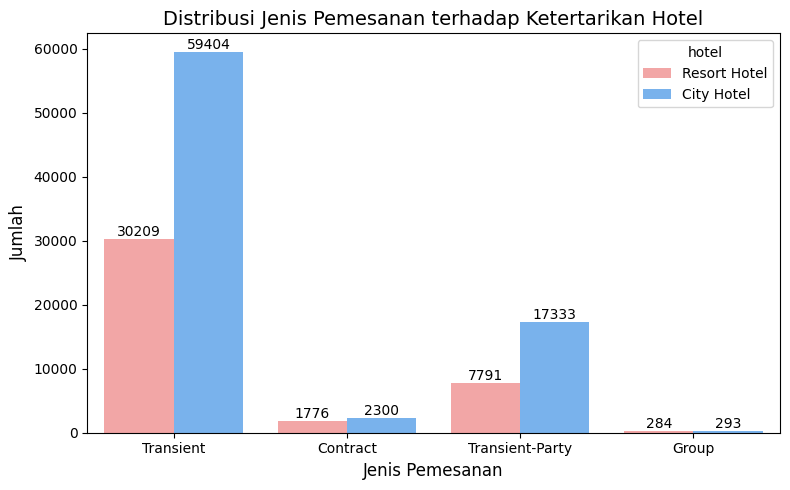

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi jenis pemesanan terhadap ketertarikan hotel
plt.figure(figsize=(8, 5))

# Mengatur palet warna secara manual
color_map = ['#FF9999', '#66B2FF']  # Warna pastel (merah muda, biru muda)
ax = sns.countplot(data=df, x='customer_type', hue='hotel', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel', fontsize=14)
plt.xlabel('Jenis Pemesanan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi jenis pemesanan terkait ketertarikan hotel, terlihat bahwa jenis pemesanan "Transient" mendominasi dengan jumlah tertinggi, mencapai sekitar 60.000. Sementara itu, jenis pemesanan "Contract" dan "Transient-Party" menunjukkan jumlah yang lebih rendah, namun pemesan untuk kategori "Transient-Party" menunjukkan minat yang cukup baik terhadap hotel. Jenis pemesanan "Group" mencatat angka terendah. Dengan demikian, dapat disimpulkan bahwa pemesanan individu (Transient) adalah yang paling menarik bagi hotel, sementara pemesanan grup dan jenis lainnya cenderung lebih terbatas.

#### 9.Informasi Status Reservasi

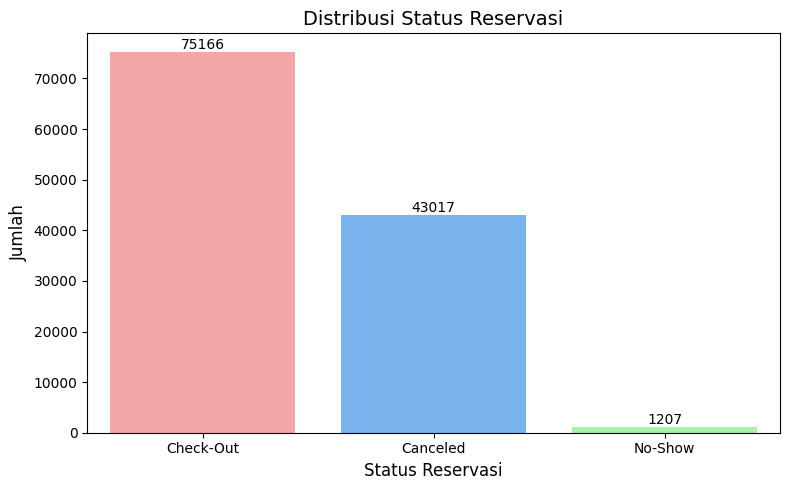

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi status reservasi
plt.figure(figsize=(8, 5))

# Mengatur palet warna secara manual
color_map = ['#FF9999', '#66B2FF', '#99FF99']  # Contoh warna pastel (merah muda, biru muda, hijau muda)
ax = sns.countplot(data=df, x='reservation_status', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Status Reservasi', fontsize=14)
plt.xlabel('Status Reservasi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi status reservasi, terlihat bahwa jumlah reservasi yang berstatus "Check-Out" sangat tinggi, melebihi 70.000. Di sisi lain, status "Canceled" juga menunjukkan angka yang signifikan, tetapi jauh lebih rendah, sekitar 40.000. Sementara itu, status "No-Show" hampir tidak terlihat dengan jumlah yang sangat kecil. Dengan demikian, dapat disimpulkan bahwa sebagian besar reservasi berakhir dengan keberangkatan (Check-Out), sementara tingkat pembatalan cukup tinggi, dan kasus tidak hadir (No-Show) sangat minim.

#### 10.Informasi Jangka Waktu Menginap

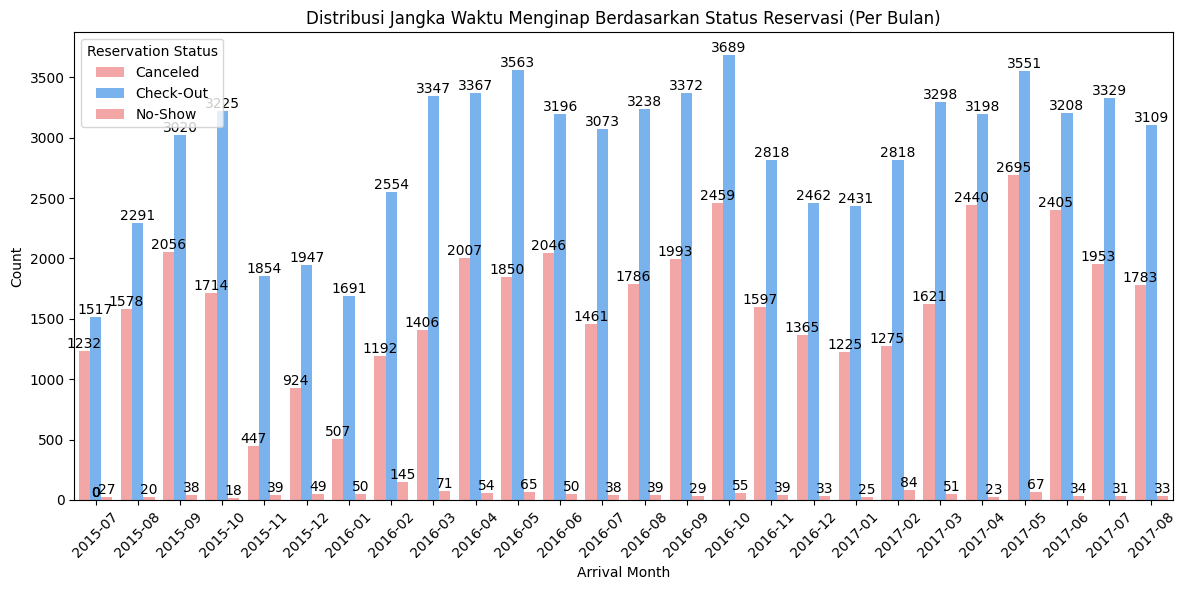

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengonversi kolom tanggal
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# Menambahkan kolom bulan sebagai pengelompokan
df['arrival_month'] = df['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan
status_count = df.groupby(['arrival_month', 'reservation_status']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
# Mengatur palet warna secara manual
color_map = ['#FF9999', '#66B2FF']  # Misalnya, merah muda dan biru muda
ax = sns.barplot(data=status_count, x='arrival_month', y='count', hue='reservation_status', palette=color_map)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Jangka Waktu Menginap Berdasarkan Status Reservasi (Per Bulan)')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reservation Status')
plt.tight_layout()
plt.show()


Visualisasi ini menunjukkan distribusi status reservasi berdasarkan durasi menginap per bulan dari Juli 2015 hingga Agustus 2017. Dalam visualisasi ini, mayoritas reservasi berakhir dengan status "Check-Out," yang terlihat mendominasi setiap bulan. Pola musiman juga terlihat jelas, dengan lonjakan jumlah "Check-Out" pada bulan-bulan tertentu. Reservasi dengan status "Canceled" menempati posisi kedua terbanyak setelah "Check-Out." Meskipun terdapat fluktuasi jumlah pembatalan dari bulan ke bulan, tren umumnya tetap stabil. Sementara itu, status "No-Show" memiliki angka yang sangat kecil jika dibandingkan dengan dua status lainnya. Jumlah "No-Show" tetap konsisten tanpa fluktuasi besar, menunjukkan bahwa ketidakhadiran tamu pada reservasi jarang terjadi dan tidak memberikan dampak signifikan terhadap pola keseluruhan.

Secara keseluruhan, visualisasi ini menunjukkan bahwa sebagian besar reservasi berhasil mencapai tahap "Check-Out," diikuti oleh jumlah pembatalan yang cukup signifikan, sementara kasus "No-Show" hanya terjadi dalam jumlah yang sangat kecil. Pola musiman pada status reservasi tertentu memberikan wawasan tambahan yang penting untuk menganalisis tren perjalanan.

## Ringkasan Eksplorasi Data

Eksplorasi data yang telah dilakukan memberikan banyak informasi dan wawasan untuk memahami dataset Hotel Bookings Data. Setiap grafik visualisasi menunjukkan pola yang beragam dan fluktuatif terkait kedatangan, pembatalan, serta ketertarikan pengunjung terhadap jenis hotel yang tersedia (Hotel Kota dan Hotel Resort).

Salah satu analisis visual yang dilakukan bertujuan untuk menggambarkan distribusi status reservasi berdasarkan waktu kedatangan per bulan. Dalam visualisasi ini, jumlah reservasi dihitung berdasarkan kombinasi bulan kedatangan (arrival_month) dan status reservasi (reservation_status). Untuk itu, kolom arrival_date_year, arrival_date_month, dan arrival_date_day_of_month digabungkan menjadi kolom baru bernama arrival_date, yang kemudian dikelompokkan berdasarkan bulan ke dalam kolom arrival_month. Dengan cara ini, informasi yang lebih jelas dan mudah terkait jumlah pengunjung yang datang dapat diambil.

Dari keseluruhan eksplorasi data ini, dapat disimpulkan bahwa terdapat pola atau variasi teratur dalam pemesanan dan pembatalan yang terjadi pada waktu-waktu tertentu dalam setahun, serta preferensi yang kuat terhadap saluran distribusi tertentu, tipe pemesanan makanan, dan pengunjung yang berasal dari berbagai negara.

# Data Preparation

Data preparation adalah langkah penting yang dilakukan untuk membersihkan, mengorganisir, dan menyiapkan data sebelum digunakan dalam analisis atau pengembangan model. Proses ini mencakup berbagai aktivitas, seperti mengidentifikasi dan menghapus data yang tidak relevan atau duplikat, serta menangani nilai yang hilang atau tidak konsisten. Selain itu, data preparation juga melibatkan pengubahan format data agar sesuai dengan kebutuhan analisis, seperti mengubah tipe data atau menggabungkan beberapa sumber data menjadi satu set yang terintegrasi.

Langkah-langkah dalam data preparation sering kali meliputi eksplorasi awal untuk memahami struktur dan karakteristik data, sehingga dapat menentukan strategi pembersihan yang paling efektif. Setelah data dibersihkan dan terstruktur dengan baik, tahap berikutnya adalah melakukan transformasi data yang diperlukan untuk analisis lebih lanjut. Dengan melakukan data preparation yang menyeluruh, analisis yang dilakukan akan lebih akurat dan hasilnya dapat diandalkan, memungkinkan pengambilan keputusan yang lebih baik berdasarkan informasi yang tersedia.

## Pra-pemrosesan Data

**Mengatasi Nilai Hilang:**  
- Untuk kolom **children**, nilai yang hilang diisi dengan 0.  
- Untuk kolom **country**, nilai yang hilang diisi dengan mode, yaitu negara yang paling sering muncul dalam dataset.  
- Untuk kolom **agent**, nilai yang hilang juga diisi dengan 0.  

**Menghilangkan Kolom:**  
- Kolom **company** dihapus dari dataset.  

**Konversi Data:**  
- Proses konversi dilakukan untuk mengubah kolom-kolom kategorikal seperti hotel, meal, country, dan kolom lainnya ke dalam format numerik, sehingga dapat digunakan oleh algoritma machine learning.  

**Normalisasi Data:**  
- Pada tahap normalisasi, digunakan StandardScaler untuk menstandarkan kolom-kolom numerik dalam dataset. Proses ini mengubah data sedemikian rupa sehingga setiap fitur memiliki rata-rata nol dan deviasi standar satu.

In [ ]:
# Mengisi nilai yang hilang
country_mode = df['country'].mode()[0]
df['country'].fillna(country_mode, inplace=True)
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df.drop(columns=['company'], inplace=True)

In [ ]:
# List kolom numerik untuk LabelEncoder
categorical_columns = ['hotel', 'meal', 'country', 'arrival_date_month', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type', 'reservation_status', 'reservation_status_date', 'arrival_date',	'arrival_month']

label_encoders = {}

for column in categorical_columns:
    if column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121,0,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121,0,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122,0,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,122,0,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,123,0,0


In [ ]:
# List kolom numerik untuk StandardScaler
numerical_columns = ['lead_time', 'arrival_date_year', 'arrival_date_month',
                     'arrival_date_week_number', 'arrival_date_day_of_month',
                     'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                     'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'agent',
                     'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                     'total_of_special_requests', 'reservation_status_date', 'arrival_month', 'arrival_date']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi hanya pada kolom numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Menampilkan hasil Standardisasi
df[numerical_columns].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_month,arrival_date
0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
1,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
2,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.698406,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
3,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.138963,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
4,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.541622,-0.131924,-0.075810,-0.254873,0.540666,-1.730957,-1.828888,-1.898893


## Hasil

In [ ]:
df # Menampilkan hasil keseluruhan data setelah pra-pemrosesan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,4.260101,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
1,1,0,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,5.793131,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
2,1,0,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,3,1,-0.18156,-0.10318,-0.091555,0,2,-0.338990,0,-0.698406,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
3,1,0,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,2,0,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.138963,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
4,1,0,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,1.541622,-0.131924,2,-0.075810,-0.254873,0.540666,1,-1.730957,-1.898893,-1.828888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,-0.758089,1.192195,-1.270288,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,15,5,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.978973,-0.131924,2,-0.112616,-0.254873,-0.720694,1,1.768322,1.637826,1.575307
119386,0,0,-0.018822,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,-0.081579,0,56,6,3,-0.18156,-0.10318,-0.091555,4,4,-0.338990,0,-0.614405,-0.131924,2,2.445779,-0.254873,1.802026,1,1.772718,1.642297,1.575307
119387,0,0,-0.655153,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,43,6,3,-0.18156,-0.10318,-0.091555,3,3,-0.338990,0,-0.614405,-0.131924,2,1.105733,-0.254873,4.324746,1,1.772718,1.642297,1.575307
119388,0,0,0.046682,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,0.132271,-0.131924,2,0.050833,-0.254873,-0.720694,1,1.772718,1.642297,1.575307


In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape

(119390, 33)

Setelah proses pembersihan, dataset yang dihasilkan mencakup:

- **Periode Pengumpulan:** 1 Juli 2015 - 31 Agustus 2017  
- **Jumlah Observasi:** 119.390  
- **Jumlah Variabel:** 33  

Dengan ini, terjadi penambahan jumlah variabel dari 32 menjadi 33. Penambahan tersebut adalah pada variabel baru yang bernama **arrival_date**, yang menggabungkan tiga variabel sebelumnya (arrival_date_year, arrival_date_month, dan arrival_date_day_of_month) ke dalam format Year-Month-Date (Y-M-d). Selain itu, untuk memperoleh informasi baru, dilakukan pengelompokan yang menghasilkan variabel baru bernama **arrival_month**.

Selain penambahan, juga dilakukan penghapusan variabel selama proses pemrosesan data, khususnya pada variabel yang bernama **company**.

### Informasi Variabel dalam Dataset

Dalam dataset **hotel.csv**, terdapat beberapa kolom yang menjadi acuan penting untuk pengolahan dan eksplorasi data. Kolom-kolom ini dipilih berdasarkan informasi yang terkandung di dalamnya dan relevansinya dengan topik pembatalan pemesanan hotel. Oleh karena itu, deskripsi penjelasan disediakan untuk memberikan informasi yang lebih lengkap.

In [ ]:
data = {
    'Kolom': ['Hotel', 'Is Canceled', 'Lead Time', 'Meal', 'Country', 'Market Segment',
                 'Distribution Channel', 'Days in Waiting List', 'Customer Type', 'Reservation Status'],
    'Deskripsi Singkat': ['Jenis hotel yang dipesan (resort atau city)',
                          'Status pemesanan: dibatalkan atau tidak',
                          'Waktu antara pemesanan dan kedatangan (dalam hari)',
                          'Pilihan makanan yang dipesan (misalnya, sarapan, makan siang, makan malam)',
                          'Negara asal pemesan (berdasarkan kode negara)',
                          'Segmen pasar tempat pemesan melakukan pemesanan',
                          'Saluran distribusi yang digunakan untuk pemesanan',
                          'Jumlah hari yang dihabiskan pemesan dalam waiting list sebelum pemesanan dikonfirmasi',
                          'Jenis pelanggan (baru atau kembali)',
                          'Status pemesanan terakhir'],
    'Isi Kolom': ['Resort, City Hotel', '0, 1', '0 - 400', 'SC, BB, HB, FB',
                      'PRT, DEU, GBR, FRA', 'Corporate, Online TA, Offline TA, Group',
                      'Corporate, Online TA, Offline TA, Group', '0 - 1000',
                      'Contract, Transient, Transient-Party', 'Canceled, Check-Out, No Show']
}

# Membuat DataFrame dari dictionary
df_summary = pd.DataFrame(data)

# Menampilkan tabel
df_summary

,Kolom,Deskripsi Singkat,Isi Kolom
0,Hotel,Jenis hotel yang dipesan (resort atau city),"Resort, City Hotel"
1,Is Canceled,Status pemesanan: dibatalkan atau tidak,"0, 1"
2,Lead Time,Waktu antara pemesanan dan kedatangan (dalam h...,0 - 400
3,Meal,"Pilihan makanan yang dipesan (misalnya, sarapa...","SC, BB, HB, FB"
4,Country,Negara asal pemesan (berdasarkan kode negara),"PRT, DEU, GBR, FRA"
5,Market Segment,Segmen pasar tempat pemesan melakukan pemesanan,"Corporate, Online TA, Offline TA, Group"
6,Distribution Channel,Saluran distribusi yang digunakan untuk pemesanan,"Corporate, Online TA, Offline TA, Group"
7,Days in Waiting List,Jumlah hari yang dihabiskan pemesan dalam wait...,0 - 1000
8,Customer Type,Jenis pelanggan (baru atau kembali),"Contract, Transient, Transient-Party"
9,Reservation Status,Status pemesanan terakhir,"Canceled, Check-Out, No Show"


# Pemodelan

Sebelum melakukan pelatihan model, langkah pertama adalah memisahkan antara fitur dan target dalam dataset. Dalam proses ini, kolom **is_canceled** dipilih sebagai target (y), sedangkan kolom-kolom lainnya berfungsi sebagai fitur (X). Setelah pemisahan, data akan dibagi menjadi set pelatihan dan set pengujian untuk keperluan evaluasi model.

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah membagi data menjadi set pelatihan dan set pengujian, langkah berikutnya adalah menginisialisasi model klasifikasi. Dalam hal ini, model yang digunakan adalah **RandomForestClassifier**, yang kemudian dilatih dengan menggunakan data pelatihan yang telah disiapkan.

In [ ]:
# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
history = rf_classifier.fit(X_train, y_train)

# Evaluasi

Langkah selanjutnya adalah melakukan evaluasi terhadap prediksi pada data uji. Model yang telah dilatih akan digunakan untuk memprediksi nilai target pada set pengujian. Untuk menilai kinerja model, akurasi dari prediksi tersebut akan dihitung.

In [ ]:
# Lakukan prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Random Forest: {accuracy}")

Akurasi Model Random Forest: 0.9999581204455985


Setelah melakukan prediksi pada data uji, langkah selanjutnya adalah melakukan analisis lebih mendalam dengan menghitung probabilitas dari kelas positif. Dalam tahap ini, dihitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) berdasarkan probabilitas yang diprediksi, untuk memberikan gambaran yang lebih jelas mengenai kinerja model.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prediksi probabilitas
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Hitung MSE (dengan probabilitas sebagai nilai kontinu)
mse = mean_squared_error(y_test, y_proba)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE) dengan probabilitas: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE) dengan probabilitas: 0.0005752826869922104
Root Mean Squared Error (RMSE): 0.02398505132352671


Setelah mengevaluasi model dengan menggunakan metrik akurasi dan kesalahan, langkah berikutnya adalah mencetak laporan klasifikasi. Laporan ini akan memberikan informasi yang lebih rinci tentang kinerja model, termasuk nilai precision, recall, dan F1-score untuk setiap kelas.Setelah mengevaluasi model menggunakan metrik akurasi dan kesalahan, langkah selanjutnya adalah mencetak laporan klasifikasi. Laporan ini akan memberikan informasi yang lebih mendetail mengenai kinerja model, termasuk precision, recall, dan F1-score untuk masing-masing kelas.

In [ ]:
# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



Setelah mencetak laporan klasifikasi, langkah terakhir adalah membuat dan memvisualisasikan prediksi dalam bentuk Confusion Matrix. Confusion Matrix ini akan memberikan gambaran yang jelas mengenai jumlah prediksi yang benar dan salah untuk setiap kelas (Not Canceled dan Canceled), sehingga dapat memberikan pemahaman yang lebih baik tentang kinerja model secara keseluruhan.

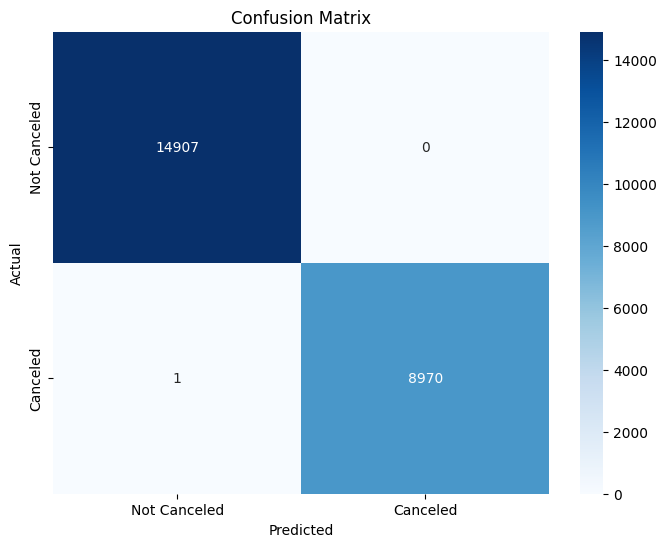

In [ ]:
# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Rangkuman

Analisis ini bertujuan untuk menggali faktor-faktor yang berpengaruh terhadap pembatalan pemesanan dan preferensi pelanggan, dengan harapan dapat memperbaiki strategi pemasaran dan mengurangi tingkat pembatalan. Dataset yang digunakan mencakup berbagai informasi, seperti negara asal pengunjung, tipe hotel, saluran distribusi, dan status pemesanan. Dalam analisis ini, metode yang diterapkan mencakup visualisasi data menggunakan histogram serta pemodelan klasifikasi dengan algoritma Random Forest untuk meramalkan pembatalan pemesanan. Selain itu, tahap pra-pemrosesan data juga dilakukan, termasuk pengisian nilai hilang, penghapusan kolom tertentu, konversi data kategorikal menjadi bentuk numerik, dan standardisasi data numerik.

Hasil dari analisis ini mengungkap beberapa wawasan menarik, seperti Portugal sebagai negara dengan jumlah pengunjung terbanyak, tingginya angka transaksi pembatalan pemesanan, serta saluran distribusi utama yang didominasi oleh agen perjalanan. Selain itu, pola tertentu terlihat dalam status reservasi. Model Random Forest yang digunakan menunjukkan performa tertentu dalam meramalkan pembatalan, dengan metrik evaluasi seperti MSE, RMSE, precision, recall, dan F1-score memberikan gambaran komprehensif tentang kinerja model.

Implikasi dari analisis ini mencakup pemahaman mengenai preferensi pelanggan berdasarkan negara asal dan tipe pemesanan, yang dapat dimanfaatkan oleh hotel untuk menyesuaikan strategi pemasaran dan layanan yang ditawarkan. Namun, analisis ini juga memiliki keterbatasan karena hanya menggunakan data yang ada. Penambahan data tambahan, seperti informasi demografi pelanggan, harga, dan ulasan, dapat memberikan wawasan yang lebih dalam. Selain itu, performa model Random Forest juga dapat ditingkatkan melalui penyetelan parameter atau dengan mengeksplorasi model alternatif.